In [74]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

veri seti: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification


In [75]:
train_dir = "kedi_kopek/train/"
test_dir = "kedi_kopek/test/"

In [76]:
X_train = ImageFolder(train_dir)
X_test = ImageFolder(test_dir)

In [77]:
print(X_train.classes)
print(X_train.class_to_idx)
print(X_train.extensions)

['cats', 'dogs']
{'cats': 0, 'dogs': 1}
('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')


In [78]:
print(X_train.samples[:2])
print(X_train.samples[-2:])

[('kedi_kopek/train/cats/cat_10.jpg', 0), ('kedi_kopek/train/cats/cat_100.jpg', 0)]
[('kedi_kopek/train/dogs/dog_98.jpg', 1), ('kedi_kopek/train/dogs/dog_99.jpg', 1)]


In [79]:
img = Image.open(X_train.samples[0][0])
print(img.size)
img = Image.open(X_train.samples[1][0])
print(img.size)

(2000, 1333)
(275, 183)


In [97]:
HEIGHT, WIDTH = 200, 300

In [98]:
transformer = transforms.Compose([
    transforms.Resize((HEIGHT, WIDTH)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(-5, 5)),
    transforms.ToTensor()
])

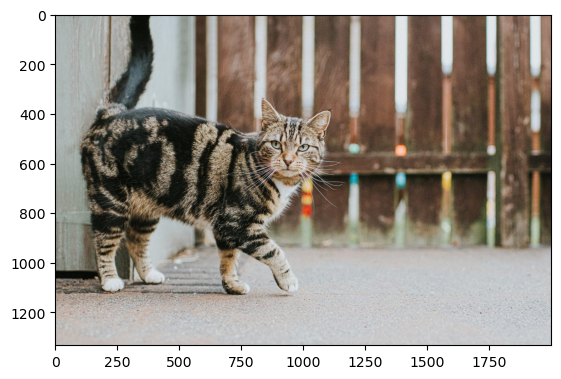

In [81]:
img = Image.open(X_train.samples[0][0])
plt.imshow(img)
plt.show()

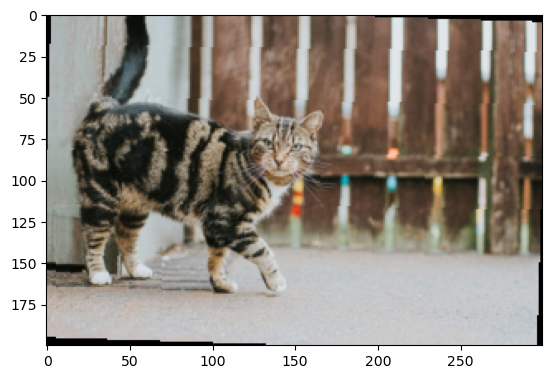

In [82]:
transformed_img = transformer(img)
plt.imshow(transformed_img.permute(1, 2, 0))
plt.show()

In [99]:
BATCH_SIZE = 8

In [100]:
train_data_loader = DataLoader(ImageFolder(
    train_dir, transformer), batch_size=BATCH_SIZE, shuffle=True)

In [101]:
train_batch = next(iter(train_data_loader))

In [104]:
def visualize_batch(batch, classes, dataset_type):
    # initialize a figure
    fig = plt.figure("{} batch".format(dataset_type))
    # loop over the batch size
    for i in range(0, BATCH_SIZE):
        ax = plt.subplot(2, int(BATCH_SIZE / 2), i + 1)
        image = batch[0][i].cpu().numpy()
        image = image.transpose((1, 2, 0))
        image = (image * 255.0).astype("uint8")
        # grab the label id and get the label from the classes list
        idx = batch[1][i]
        label = classes[idx]
        # show the image along with the label
        plt.imshow(image)
        plt.title(label)
        plt.axis("off")
    # show the plot
    plt.tight_layout()
    plt.show()

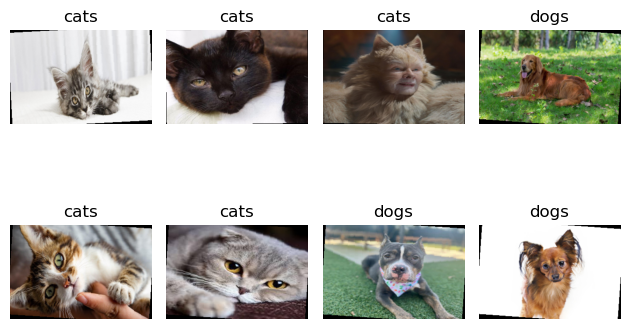

In [105]:
visualize_batch(train_batch, X_train.classes, "train")